Base Image Loaded with examples: 7
Scattering Flare Image: Flare7K  is loaded successfully with examples 5000
Now we have 5000 scattering flare images
Reflective Flare Image: Flare7K  is loaded successfully with examples 2000
Now we have 2000 refelctive flare images
Light source detected in position: x: 266 ,y: 252


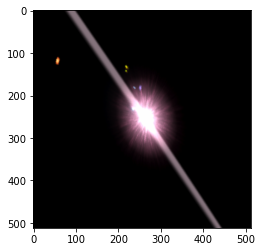

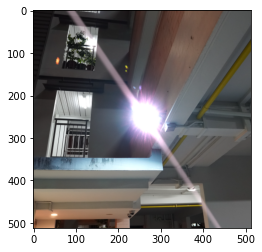

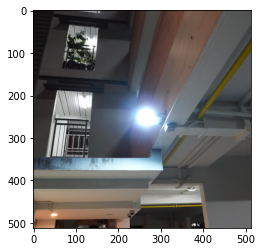

In [26]:
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from data_loader_loc import Flare_Image_Loader
import torchvision.transforms.functional as TF

class MyTranslationTransform(object):
    def __init__(self, position):
        self.position = position

    def __call__(self, x):
        return TF.affine(x,angle=0, scale=1,shear=[0,0], translate= list(self.position))

transform_base=transforms.Compose([transforms.RandomCrop((512,512),pad_if_needed=True,padding_mode='reflect'),
							  transforms.RandomHorizontalFlip()
                              ])

flare_image_loader=Flare_Image_Loader('Nighttime_base',transform_base,transform_flare=None)
flare_image_loader.load_scattering_flare('Flare7K','Flare7k/Scattering_Flare/Compound_Flare')
flare_image_loader.load_reflective_flare('Flare7K','Flare7k/Reflective_Flare')
img_index=5
test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[img_index]

plt.imshow(test_flare_img.permute(1,2,0))
plt.show()
plt.imshow(test_merge_img.permute(1,2,0))
plt.show()
plt.imshow(test_base_img.permute(1,2,0))
plt.show()

Light source detected in position: x: 278 ,y: 250
torch.Size([3, 512, 1024])


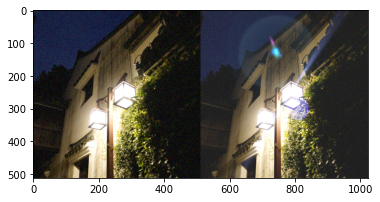

Light source detected in position: x: 231 ,y: 235
torch.Size([3, 512, 1024])


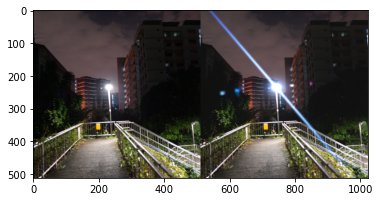

Light source detected in position: x: 265 ,y: 271
torch.Size([3, 512, 1024])


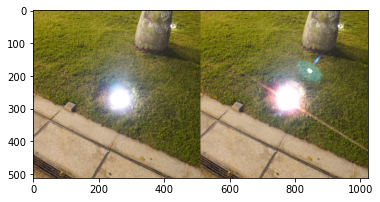

Light source detected in position: x: 261 ,y: 249
torch.Size([3, 512, 1024])


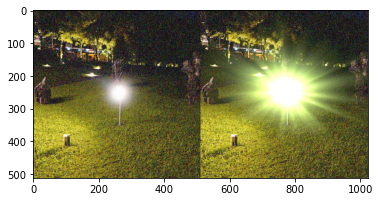

Light source detected in position: x: 271 ,y: 252
torch.Size([3, 512, 1024])


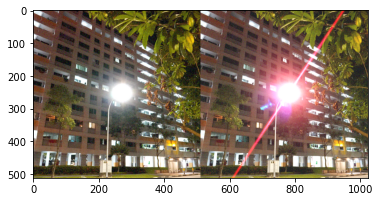

In [37]:
import torch
for i in range(5):
    test_base_img,test_flare_img,test_merge_img,flare_mask=flare_image_loader[i]
    imgs_stack=torch.cat((test_base_img,test_merge_img),2)
    print(imgs_stack.shape)
    plt.imshow(imgs_stack.squeeze(0).permute(1,2,0))
    plt.show()